# ALQUILERES AIRBNB EN EUROPA

**Descripción:**
Departamentos en alquiler en AIRBNB en Europa, en función de tipo de las características del local.

**Variables de interés:**
Ciudad, Precio, Tipo, Capacidad, Distancias a puntos de interés, Distancias al metro

**Fuente:** 
https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset

**Objetivo:**
Generar hipótesis de interés sobre el dataset, crear visualizaciones e interpretar los resultados obtenidos.

## 1- ABSTRACT

- Motivación: Generar un modelo matemático que nos permita obtener el valor de alquiler que puede rentabilizarse de una propiedad. Ésta fórmula nos posibilatará saber si es económicamente conveniente comprar una propiedad, relacionando su valor de venta, rentabilidad esperada y valor de alquiler, según la fórmula obtenida.
  
- Contexto comercial: En los últimos años ha crecido sustancialmente la cantidad de propiedades en alquiler con fines turísticos en distintas ciudades de Europa, reemplazando muchas veces como destino de turismo el lugar que antes ocupaban las habitaciones de hotel. Tenemos en nuestro poder los datos de las propiedades en alquiler y sus características en las principales ciudades europeas. Hemos sido contratados para determinar el precio de alquiler en función de los datos de cada una, según un modelo matemático, lo que permitirá saber si es conveniente, o no, comprar una propiedad para ponerla en alquiler con esos fines.

- Audiencia objetivo: Inversores interesados en compra de propiedades en Europa para darle destino de alquiler y obtener una renta relacionada con el monto de la inversión.
  
- Problema comercial: Conociendo los datos de una propiedad particular, (como ser, ciudad en la que se encuenta, capacidad de personas, cantidad de dormitorios, cercanía a atracciones y restaurantes) debemos ser capaces de obtener el precio de alquiler que puede obtenerse al ponerla en renta. Con este valor, podremos calcular el máximo valor que podemos pagar para comprarla, en función de la rentabilidad que deseamos obtener de esa inversión. 
  
- Preguntas/hipótesis: Dada una propiedad con sus características conocidas, ¿podemos averiguar cuál es el precio de alquiler que puede obtenerse al ponerla en renta? ¿El valor de alquiler varía en función de la ciudad en que se encuentra? ¿Las caracterísiticas de la propiedad (ubicación, tamaño, capacidad) modifican el precio de alquiler? ¿Es conveniente comprar una propiedad mejor ubicada o de mayor capacidad, a los fines de obtener una mayor rentabilidad de la inversión? ¿Qué caracterísitica es la más valorada por los usuarios a los fines de pagar un mayor precio de alquiler?
  
- Contexto analítico: Toda la información recopilada se encuentra subida en un archivo .csv en un repositorio de github, de donde debermos leer, transformar y preparar los datos para su mejor visualización. Luego realizaremos análisis y gráficos para encontrar relaciones entre las distintas variables y los precios de alquiler.


## 2- PREPARACIÓN DE DATOS


En primer lugar importaremos los datos desde nuestro repositorio de github y reemplazaremos los nombres de las columnas para eliminar espacios blancos, buscando evitar problemas en el código futuro.

In [50]:
import pandas as pd
import requests
from io import StringIO

url = 'https://raw.githubusercontent.com/tekluis/CoderHouse/main/Aemf.csv'
response = requests.get(url).text
csv_data = StringIO(response)

df = pd.read_csv(csv_data)

df = df.drop('Normalised Attraction Index', axis=1)
df = df.drop('Normalised Restraunt Index', axis=1)

nombres_nuevos = {
    'Room Type': 'Room_Type',
    'Shared Room': 'Shared_Room',
    'Private Room': 'Private_Room',
    'Person Capacity': 'Person_Capacity',
    'Multiple Rooms': 'Multiple_Rooms',
    'Cleanliness Rating': 'Cleanliness_Rating',
    'Guest Satisfaction': 'Guest_Satisfaction',
    'City Center (km)': 'City_Center',
    'Metro Distance (km)': 'Metro_Distance',
    'Attraction Index': 'Attraction_Index',
    'Restraunt Index': 'Restraunt_Index'
}

df = df.rename(columns=nombres_nuevos)

df['Attraction_Index'] = df['Attraction_Index']/1000
df['Restraunt_Index'] = df['Restraunt_Index']/1000

print("Cantidad de filas:", df.shape[0])
print("Cantidad de columnas:", df.shape[1])
df

Cantidad de filas: 41714
Cantidad de columnas: 17


,City,Price,Day,Room_Type,Shared_Room,Private_Room,Person_Capacity,Superhost,Multiple_Rooms,Business,Cleanliness_Rating,Guest_Satisfaction,Bedrooms,City_Center,Metro_Distance,Attraction_Index,Restraunt_Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,0.078690,0.098254
1,Amsterdam,344.245776,Weekday,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,0.631176,0.837281
2,Amsterdam,264.101422,Weekday,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,0.075276,0.095387
3,Amsterdam,433.529398,Weekday,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,0.493273,0.875033
4,Amsterdam,485.552926,Weekday,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,0.552830,0.815306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6,False,0,1,10,100,3,0.530181,0.135447,0.219402,0.438757
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2,False,0,0,8,86,1,0.810205,0.100839,0.204970,0.342183
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2,False,0,0,10,93,1,0.994051,0.202539,0.169073,0.282296
41712,Vienna,301.054157,Weekend,Private room,False,True,2,False,0,0,10,87,1,3.044100,0.287435,0.109237,0.158563


Columnas de interés:
- City: Ciudad en la que se encuentra ubicada la propiedad en alquiler.
- Price: Precio de alquiler actual, expresado en euros por día.
- Person_Capaciy: Cantidad de personas máxima que puede albergar la propiedad.
- Bedrooms: Cantidad de habitaciones disponibles en la propiedad.
- City_Center: Distancia al centro de la ciudad medida en kms.
- Metro_Distance: Distancia a la parada del metro más cercana en kms.
- Atraction_Index: Cantidad de atracciones cercanas.
- Restraunt_Index: Cantidad de restaurantes cercanos.

## 3- EXPLORATORY DATA ANALYSIS

Para definir cuáles de las columnas de interés, enumeradas en el apartado anterior, tiene mayor relación con el precio de alquiler, realizaremos una matriz de correlación entre ellas.

/var/folders/6b/nxxkks4j4t5815ftmyvm6xgh0000gn/T/ipykernel_74949/3364459110.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


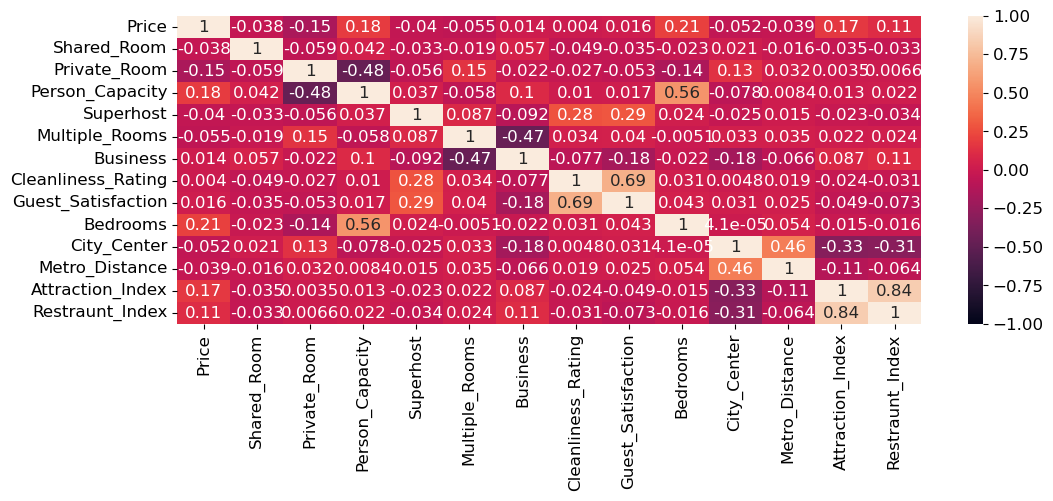

In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,4))
ax=sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
plt.show()

En la primera columna de la tabla anterior, podemos ver que las variables indepedientes que mejor correlacionan con la variable dependiente 'Price' son 'Private_Room', 'Person_Capacity', 'Bedrooms', 'Attraction_Index' y 'Restraunt_Index'.

Haremos algunos gráficos para entender mejor la relación. En primer lugar analizaremos Person_Capacity y Bedrooms.

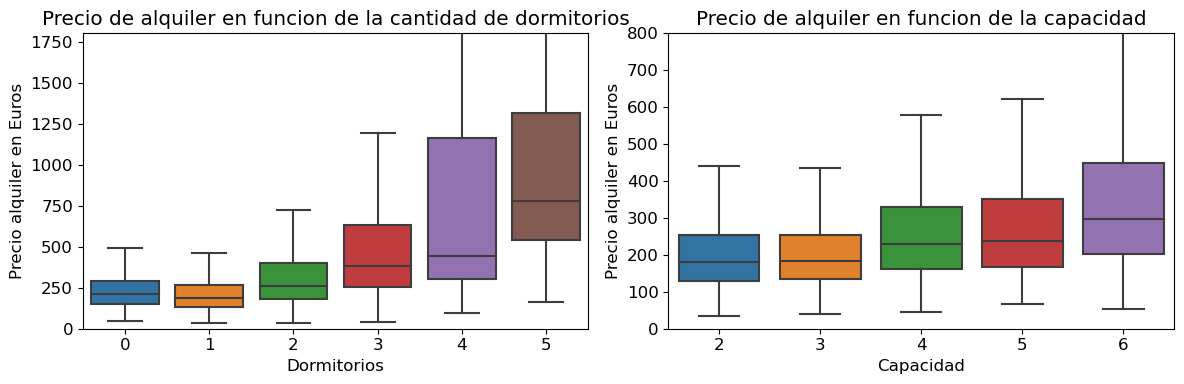

In [52]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.boxplot(data=df, y='Price', x='Bedrooms', showfliers=False, ax=ax[0])
ax[0].set(title='Precio de alquiler en funcion de la cantidad de dormitorios', xlabel='Dormitorios',
       ylabel='Precio alquiler en Euros', ylim=(0,1800), xlim=(-0.5,5.5))

sns.boxplot(data=df, y='Price', x='Person_Capacity', showfliers=False, ax=ax[1])
ax[1].set(title='Precio de alquiler en funcion de la capacidad', xlabel='Capacidad',
       ylabel='Precio alquiler en Euros', ylim=(0,800))

plt.tight_layout()
plt.show()

Según los gráficos parece que ambas variables, Bedrooms y Person_Capacity, correlacionan bastante bien con el precio. 

Continuando con los gráficos, haremos lo mismo con Attraction_Index y Restraunt_Index

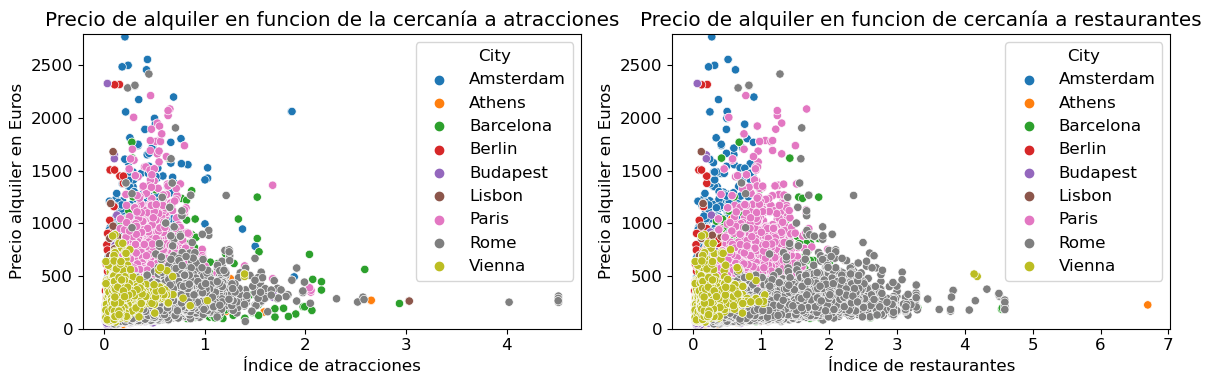

In [53]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.scatterplot(data=df, y='Price', x='Attraction_Index', hue='City',ax=ax[0])
ax[0].set(title='Precio de alquiler en funcion de la cercanía a atracciones', xlabel='Índice de atracciones',
       ylabel='Precio alquiler en Euros', ylim=(0,2800))

sns.scatterplot(data=df, y='Price', x='Restraunt_Index', hue='City', ax=ax[1])
ax[1].set(title='Precio de alquiler en funcion de cercanía a restaurantes', xlabel='Índice de restaurantes',
       ylabel='Precio alquiler en Euros', ylim=(0,2800))

plt.tight_layout()
plt.show()

Según los gráficos anteriores no podemos concluir que haya relación directa en entre las variables Attraction_Index y Restarurant_Index y el precio de alquiler.

Para terminar con los gráficos, analizaremos la variable categórica 'Private_Room' en relación al precio, en un gráfico general para todas las ciudades y en otro discriminado por ciudad.

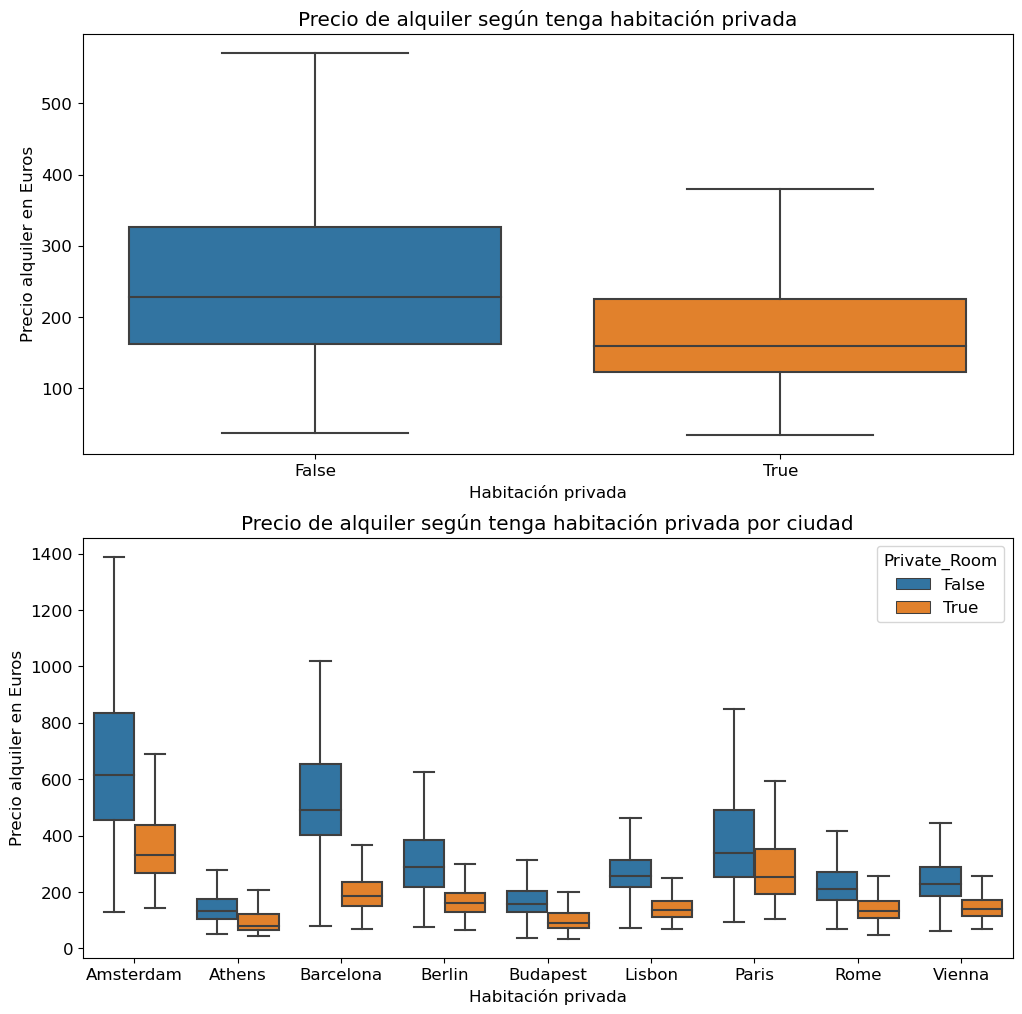

In [54]:
fig, ax = plt.subplots(2,1,figsize=(12,12))

sns.boxplot(data=df, y='Price', x='Private_Room', showfliers=False, ax=ax[0])
ax[0].set(title='Precio de alquiler según tenga habitación privada', xlabel='Habitación privada',
       ylabel='Precio alquiler en Euros')

sns.boxplot(data=df, y='Price', x='City', hue='Private_Room', showfliers=False, ax=ax[1])
ax[1].set(title='Precio de alquiler según tenga habitación privada por ciudad', xlabel='Habitación privada',
       ylabel='Precio alquiler en Euros')

plt.show()

Según los gráficos anteriores, tanto a nivel general, como discrimando por ciudad, los precios son mayores cuando la habitación en alquiler no es privada.

Para avanzar con las conclusiones, usaremos la librería pingouin para calcular los p-values para determinar si las 5 variables independientes están relacionadas con la variable dependiente precio.

In [55]:
import pingouin as pg

print('-------------------------------------------------------------')
correlation = pg.corr(x=df['Person_Capacity'], y=df['Price'])
print('Person Capacity:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df['Bedrooms'], y=df['Price'])
print('Bedrooms:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df['Attraction_Index'], y=df['Price'])
print('Attraction Index:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df['Restraunt_Index'], y=df['Price'])
print('Restraunt Index:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df['Private_Room'], y=df['Price'])
print('Private_Room:')
print(correlation)
print('-------------------------------------------------------------')

-------------------------------------------------------------
Person Capacity:
             n         r         CI95%          p-val       BF10  power
pearson  41714  0.179969  [0.17, 0.19]  1.295786e-300  9.94e+295    1.0
-------------------------------------------------------------
Bedrooms:
             n         r        CI95%  p-val BF10  power
pearson  41714  0.206687  [0.2, 0.22]    0.0  inf    1.0
-------------------------------------------------------------
Attraction Index:
             n         r         CI95%          p-val        BF10  power
pearson  41714  0.168785  [0.16, 0.18]  3.791096e-264  3.637e+259    1.0
-------------------------------------------------------------
Restraunt Index:
             n         r        CI95%          p-val        BF10  power
pearson  41714  0.113171  [0.1, 0.12]  6.021365e-119  3.467e+114    1.0
-------------------------------------------------------------
Private_Room:
             n         r           CI95%          p-val        BF1

Vemos que en todos los casos el p-val es mucho menor a 0.05 lo que indica que existe una relación y que puede recharzarse la hipótesis nula.
Sin embargo, en todos los casos estudiados, el valor r está más cerca de 0 que de 1, lo que indica que la correlación es débil.

Para poder analizar con más detalle, tomaremos los datos de una única ciudad, ya que pensamos que al analizar todas al ciudades en un único grupo puede afectar nuestro cálculo. Para ello graficaremos cuál es la ciudad que tiene más locales en alquiler y eliminaremos los datos de las demás ciudades.

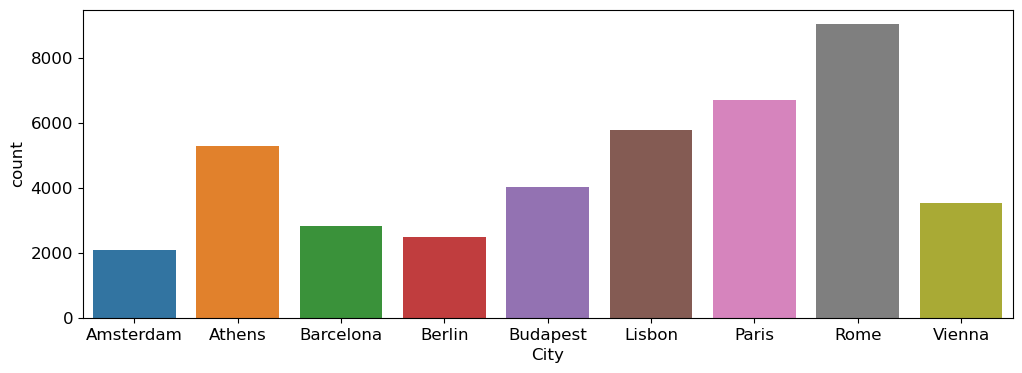

In [56]:
fig, ax = plt.subplots(figsize=(12,4))
ax=sns.countplot(data=df, x='City')
plt.show()

Podemos observar que Roma es la ciudad que tiene más locales en alquiler, por lo que desecharemos las demás ciudades y repetiremos los cálculos realizados anteriormente.

/var/folders/6b/nxxkks4j4t5815ftmyvm6xgh0000gn/T/ipykernel_74949/4119534950.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_Rome.corr()


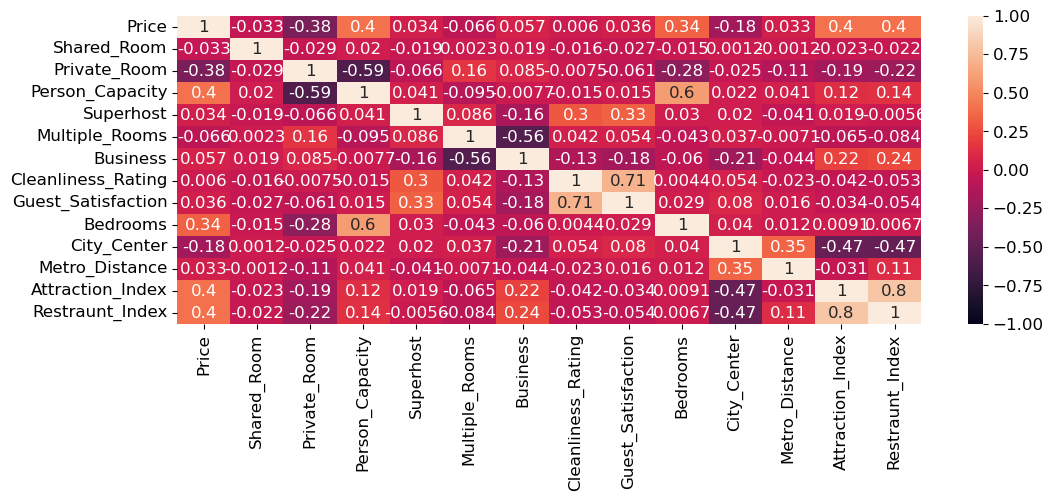

In [57]:
df_Rome=df[df['City']=='Rome']
correlation_matrix = df_Rome.corr()
fig, ax = plt.subplots(figsize=(12,4))
ax=sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
plt.show()


Podemos ver que la matriz de correlación mejoró notablemente los índices entre las variables elegidas 'Person_Capacity', 'Bedrooms', 'Attraction_Index', 'Restraunt_Index' y 'Private_Room' respecto a la variable dependiente 'Price' pasando de 0.1-0.2 a 0.3-0.4

Por otra parte, podemos ver que las variables 'Attraction_Index' y 'Restraunt_Index' están fuertemente relacionadas, lo que indica que dan una información similar, por lo tanto sólo nos quedaremos sólo con 'Attraction_Index'.

Nuevamente calcularemos los p-valores y r con pingouin, pero esta vez sólo para la ciudad de Roma.

In [58]:
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_Rome['Person_Capacity'], y=df_Rome['Price'])
print('Person Capacity:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_Rome['Bedrooms'], y=df_Rome['Price'])
print('Bedrooms:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_Rome['Attraction_Index'], y=df_Rome['Price'])
print('Attraction Index:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_Rome['Private_Room'], y=df_Rome['Price'])
print('Private_Room:')
print(correlation)
print('-------------------------------------------------------------')

-------------------------------------------------------------
Person Capacity:
            n         r         CI95%  p-val BF10  power
pearson  9027  0.403907  [0.39, 0.42]    0.0  inf    1.0
-------------------------------------------------------------
Bedrooms:
            n         r         CI95%          p-val        BF10  power
pearson  9027  0.336617  [0.32, 0.35]  5.181617e-238  5.627e+233    1.0
-------------------------------------------------------------
Attraction Index:
            n        r         CI95%  p-val BF10  power
pearson  9027  0.40231  [0.38, 0.42]    0.0  inf    1.0
-------------------------------------------------------------
Private_Room:
            n       r           CI95%          p-val        BF10  power
pearson  9027 -0.3757  [-0.39, -0.36]  1.411633e-300  1.793e+296    1.0
-------------------------------------------------------------


Nuevamente vemos que los índices mejoraron notablemente, ya que los p-val se mantienen muy por debajo de 0.05 y además los valores de r mejoraron, pasando de 0.1-0.2 a 0.3-0.4

Por último, crearemos un modelo lineal con la librería statsmodel para los locales de Roma.

In [59]:
import statsmodels.formula.api as sm

model = 'Price ~ Person_Capacity + Bedrooms + Attraction_Index + Private_Room'
lm    = sm.ols(formula = model, data = df_Rome).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     1109.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:14:56   Log-Likelihood:                -54115.
No. Observations:                9027   AIC:                         1.082e+05
Df Residuals:                    9022   BIC:                         1.083e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               57.8881      4.464     12.967      0.000      49.137      66.639
Private_Room[T.True]   -40.3660      2.637    -15.306      0.000     -45.535     -35.197
Person_Capacity         13.3232      1.158     11.502      0.000      11.053      15.594
Bedrooms                42.8450      2.335     18.351      0.000      38.268      47.422
Attraction_Index       139.2528      3.488     39.918      0.000     132.415     146.091
==============================================================================
Omnibus:                    13484.395   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9571858.035
Skew:                           8.979   Prob(JB):                         0.00
Kurtosis:                     161.512   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Según el análisis anterior podemos decir a favor del modelo que, para las 5 variables independientes elegidas:
- los valores de P>|t| se encuentran muy por debajo de 0.05
- los coeficientes de relación no incluyen pendiente igual a 0 con el 95% de probabilidad 
- los valores de std err son relativamente bajos (entre un 5% a 10%) respecto a los valores de coef

Sin embargo, debe tenerse en cuenta el r-squared indica que sólo el 33% de la variabilidad es explicada por el modelo.

## 4- MACHINE LEARNING

### A- FEATURE SELECTION

En función de lo analizado anteriormente, usaremos el método de Forward Selection para reducir la dimensionalidad de nuestro dataset.

Para ello, pediremos que seleccione las 5 mejores variables independientes que mejor explican la variación de la variable dependiente precio.

In [60]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

X=df_Rome.drop(['Price','City','Day','Room_Type'],1)
y=df_Rome['Price']

sfs.fit(X, y)
sfs.k_feature_names_ 

/var/folders/6b/nxxkks4j4t5815ftmyvm6xgh0000gn/T/ipykernel_74949/2429436873.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_Rome.drop(['Price','City','Day','Room_Type'],1)


('Private_Room',
 'Person_Capacity',
 'Bedrooms',
 'Attraction_Index',
 'Restraunt_Index')

Vemos que el resultado obtenido es el mismo que habíamos obtenido anteriormente usando la matriz de correlación.

Repetiremos el cálculo anterior, pero esta vez usaremos el Backward Selection, para confirmar la inforamción obtenida.

In [61]:
sfs = SFS(LinearRegression(),
          k_features=5,
          forward=False,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X, y)
sfs.k_feature_names_ 

('Private_Room',
 'Person_Capacity',
 'Bedrooms',
 'Attraction_Index',
 'Restraunt_Index')

Los resultados obtenido son los mismos para Foward Selection y Backward Selection, a la vez que coinciden con los obtenidos en nuestra matriz de correlación.

Siguiente nuestro análisis anterior, pediremos que elimine una de las 5 variables independientes escogida, ya que habíamos verificado que 'Attraction_Index' y 'Restraunt_Index' indican la misma información.

In [62]:
sfs = SFS(LinearRegression(),
          k_features=4,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X, y)
sfs.k_feature_names_ 

('Private_Room', 'Person_Capacity', 'Bedrooms', 'Attraction_Index')

La variable eliminada fue 'Restraunt_Index' quedándonos con las otras 4 variables que habíamos escogido anterioremente.

Podemos concluir a través de los distintos métodos usados (Forward Selection, Backward Selection y Matriz de correlación) que las variables que mejor explican el comportamiento del precio son: 'Private_Room', 'Person_Capacity', 'Bedrooms' y 'Attraction_Index'

### B- ALGORITMOS DE MACHINE LEARNING

Habiendo obtenido las variables independientes que mejor explican las variaciones en el precio, usaremos varios modelos de machine learning, para luego comparar sus desempeños mediante las métricas correspondientes.

#### I- REGRESIÓN LINEAL

El primer algoritmo que usaremos será el de regresión linela, ya que se trata de uno de los más sencillos.

In [63]:
from sklearn.model_selection import train_test_split

X=df_Rome.drop(['Price','City','Day','Room_Type','Shared_Room','Superhost','Multiple_Rooms','Business', 'Cleanliness_Rating',
                'Guest_Satisfaction','City_Center','Metro_Distance','Restraunt_Index'],1)
y=df_Rome['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

coeficientes = lr.coef_
intercepto = lr.intercept_

print("Variables:", X.columns)
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)


Variables: Index(['Private_Room', 'Person_Capacity', 'Bedrooms', 'Attraction_Index'], dtype='object')
Coeficientes: [-39.76009596  13.60331108  43.70066499 138.94134773]
Intercepto: 56.3883013928328


/var/folders/6b/nxxkks4j4t5815ftmyvm6xgh0000gn/T/ipykernel_74949/3681142813.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_Rome.drop(['Price','City','Day','Room_Type','Shared_Room','Superhost','Multiple_Rooms','Business', 'Cleanliness_Rating',


El modelo obtenido indica que el precio de los alquileres parte de una base de 56 euros por día, aumentando 14 euros por cada persona adicional de capacidad, 44 euros por cada habitación adicional y 139 euros por cada punto de mejora en cercanía a atracciones. Además, baja 40 euros en caso de tener habitación privada.

Estos valores son coherentes con los obtenidos anteriormente mendiante la librería statsmodel.

Para validar el modelo obtenido calcularemos las métricas:
- MAPE: Error absoluto medio porcentual
- MAE: Error absoluto medio
- MSE: Error cuadrático medio
- RMSE: Raiz del error cuadrático medio
- RMSLE: Raiz del error cuadrático medio del logaritmo
- R2: Coeficiente de determinación

Estas métricas serán calculadas tanto para el conjunto de training como para el de test.

In [64]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('------------------------')
print('Métricas Regresión Lineal (test values)')
print('------------------------')

mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
mae_lr=mean_absolute_error(y_test,y_pred_lr)
mse_lr=mean_squared_error(y_test,y_pred_lr)
rmse_lr=np.sqrt(mean_squared_error(y_test,y_pred_lr))
rmsle_lr=np.log(np.sqrt(mean_squared_error(y_test,y_pred_lr)))
r2_lr=r2_score(y_test,y_pred_lr)

print("MAPE",mape_lr)
print("MAE",mae_lr)
print("MSE",mse_lr)
print("RMSE",rmse_lr)
print("RMSLE",rmsle_lr)
print("R2",r2_lr)

print('------------------------')
print('Métricas Regresión Lineal (train values)')
print('------------------------')

mape_lr_train = mean_absolute_percentage_error(y_train, y_pred_train_lr)
mae_lr_train=mean_absolute_error(y_train,y_pred_train_lr)
mse_lr_train=mean_squared_error(y_train,y_pred_train_lr)
rmse_lr_train=np.sqrt(mean_squared_error(y_train,y_pred_train_lr))
rmsle_lr_train=np.log(np.sqrt(mean_squared_error(y_train,y_pred_train_lr)))
r2_lr_train=r2_score(y_train,y_pred_train_lr)

print("MAPE",mape_lr_train)
print("MAE",mae_lr_train)
print("MSE",mse_lr_train)
print("RMSE",rmse_lr_train)
print("RMSLE",rmsle_lr_train)
print("R2",r2_lr_train)


------------------------
Métricas Regresión Lineal (test values)
------------------------
MAPE 0.24366908891986908
MAE 46.88225496683435
MSE 5511.49035220852
RMSE 74.23941239132029
RMSLE 4.307295173459018
R2 0.4416684264998433
------------------------
Métricas Regresión Lineal (train values)
------------------------
MAPE 0.2486394624143871
MAE 51.21693776697149
MSE 10411.138353674201
RMSE 102.03498592970061
RMSLE 4.625315753784245
R2 0.3111264605297571


Las métricas del primer modelo elegido, regresión lineal, indican un MAPE de 24% lo que es un valor un poco alto. Por otra parte, el valor de r2 indicar que las variables independientes explican entre un 31% y 44% de la variación del precio, en función de los valores de test y de train, respectivamente.

Entendemos que puede tratarse de un problema de underfitting, ya que el modelo tiene peores métricas entre los valores de training que entre los valores de test. Una posible solución sería complejizar el modelo, por lo que continuaremos con regresión polinómica.

#### II- REGRESIÓN POLINÓMICA

In [65]:
from sklearn.preprocessing import PolynomialFeatures

grado_polynomial = 3
poly_features = PolynomialFeatures(degree=grado_polynomial)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

modelo_polynomial = LinearRegression()
modelo_polynomial.fit(X_train_poly, y_train)

y_pred_train_poly = modelo_polynomial.predict(X_train_poly)
y_pred_poly = modelo_polynomial.predict(X_test_poly)

coeficientes = modelo_polynomial.coef_
intercepto = modelo_polynomial.intercept_

print("Variables:", X.columns)
# print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)
print("-----------------------------")


print('Métricas Regresión Polinómica (test values)')
print('-----------------------------')

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly)
mae_poly=mean_absolute_error(y_test,y_pred_poly)
mse_poly=mean_squared_error(y_test,y_pred_poly)
rmse_poly=np.sqrt(mean_squared_error(y_test,y_pred_poly))
rmsle_poly=np.log(np.sqrt(mean_squared_error(y_test,y_pred_poly)))
r2_poly=r2_score(y_test,y_pred_poly)

print("MAPE",mape_poly)
print("MAE",mae_poly)
print("MSE",mse_poly)
print("RMSE",rmse_poly)
print("RMSLE",rmsle_poly)
print("R2",r2_poly)

print('------------------------')
print('Métricas Regresión Polinómica (train values)')
print('-----------------------------')

mape_poly_train = mean_absolute_percentage_error(y_train, y_pred_train_poly)
mae_poly_train=mean_absolute_error(y_train,y_pred_train_poly)
mse_poly_train=mean_squared_error(y_train,y_pred_train_poly)
rmse_poly_train=np.sqrt(mean_squared_error(y_train,y_pred_train_poly))
rmsle_poly_train=np.log(np.sqrt(mean_squared_error(y_train,y_pred_train_poly)))
r2_poly_train=r2_score(y_train,y_pred_train_poly)

print("MAPE",mape_poly_train)
print("MAE",mae_poly_train)
print("MSE",mse_poly_train)
print("RMSE",rmse_poly_train)
print("RMSLE",rmsle_poly_train)
print("R2",r2_poly_train)

Variables: Index(['Private_Room', 'Person_Capacity', 'Bedrooms', 'Attraction_Index'], dtype='object')
Intercepto: 243.91958523408653
-----------------------------
Métricas Regresión Polinómica (test values)
-----------------------------
MAPE 0.23270992266358115
MAE 44.565913144865554
MSE 4929.145725382315
RMSE 70.20787509519366
RMSLE 4.25146048558318
R2 0.5006617969019069
------------------------
Métricas Regresión Polinómica (train values)
-----------------------------
MAPE 0.24127354619027633
MAE 49.59492214354989
MSE 9788.86747118378
RMSE 98.9387056271901
RMSLE 4.594500523312432
R2 0.3523002429508857


El MAPE de este modelo, regresión polinómica, es casi idéntico al obtenido en regresión lineal, entre 23% y 24%. Por otra parte, el valor de r2 muestra una mejoría, pasando de 44% a 50% y de 31% a 35%. 

En resumen, el modelo de regresión polinómica presenta algunas mejoras respecto a la regresión lineal. Para continuar, compararemos esto con el modelo KNN.

#### III- KNN

In [66]:
from sklearn.neighbors import KNeighborsRegressor

knn_regresor = KNeighborsRegressor(n_neighbors=5)
knn_regresor.fit(X_train, y_train)

y_pred_train_knn = knn_regresor.predict(X_train)
y_pred_knn = knn_regresor.predict(X_test)

print('------------------------')
print('Métricas Regresión KNN (test values)')
print('----------------------')
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
mae_knn=mean_absolute_error(y_test,y_pred_knn)
mse_knn=mean_squared_error(y_test,y_pred_knn)
rmse_knn=np.sqrt(mean_squared_error(y_test,y_pred_knn))
rmsle_knn=np.log(np.sqrt(mean_squared_error(y_test,y_pred_knn)))
r2_knn=r2_score(y_test,y_pred_knn)

print("MAPE",mape_knn)
print("MAE",mae_knn)
print("MSE",mse_knn)
print("RMSE",rmse_knn)
print("RMSLE",rmsle_knn)
print("R2",r2_knn)


print('------------------------')
print('Métricas Regresión KNN (train values)')
print('----------------------')

mape_knn_train = mean_absolute_percentage_error(y_train, y_pred_train_knn)
mae_knn_train=mean_absolute_error(y_train,y_pred_train_knn)
mse_knn_train=mean_squared_error(y_train,y_pred_train_knn)
rmse_knn_train=np.sqrt(mean_squared_error(y_train,y_pred_train_knn))
rmsle_knn_train=np.log(np.sqrt(mean_squared_error(y_train,y_pred_train_knn)))
r2_knn_train=r2_score(y_train,y_pred_train_knn)

print("MAPE",mape_knn_train)
print("MAE",mae_knn_train)
print("MSE",mse_knn_train)
print("RMSE",rmse_knn_train)
print("RMSLE",rmsle_knn_train)
print("R2",r2_knn_train)

------------------------
Métricas Regresión KNN (test values)
----------------------
MAPE 0.2374289375193017
MAE 46.69205967338648
MSE 5642.4490492094
RMSE 75.11623692125026
RMSLE 4.319036739412692
R2 0.42840189227997805
------------------------
Métricas Regresión KNN (train values)
----------------------
MAPE 0.1972917087096607
MAE 40.87469185802964
MSE 6872.743767510065
RMSE 82.90201304859892
RMSLE 4.4176593447004535
R2 0.5452513294738925


En este caso, el modelo KNN, mejora un poco los valores de MAPE, bajando a 23% y 20% para los valores de test y de train, respectivamente. A su vez, el valor de r2 mejora a 54% en los valores de train, mientras que el r2 en los valores de test empeora un poco a 43%, acercándose a la métrica obtenida en regresión lineal. 

Debido a que este modelo muestra mejores parámetros en los valores de train que los de test, creemos que puede estar afectado por overfitting.

Como último modelo a probar, usaremos random forest.

#### IV- RANDOM FOREST

In [67]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

y_pred_train_rf = modelo_rf.predict(X_train)  # Predicciones en el conjunto de entrenamiento
y_pred_rf = modelo_rf.predict(X_test)  # Predicciones en el conjunto de prueba

print('------------------------')
print('Métricas Regresión Random Forest (test values)')
print('------------------------')
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
mae_rf=mean_absolute_error(y_test,y_pred_rf)
mse_rf=mean_squared_error(y_test,y_pred_rf)
rmse_rf=np.sqrt(mean_squared_error(y_test,y_pred_rf))
rmsle_rf=np.log(np.sqrt(mean_squared_error(y_test,y_pred_rf)))
r2_rf=r2_score(y_test,y_pred_rf)

print("MAPE",mape_rf)
print("MAE",mae_rf)
print("MSE",mse_rf)
print("RMSE",rmse_rf)
print("RMSLE",rmsle_rf)
print("R2",r2_rf)


print('------------------------')
print('Métricas Regresión Randrom Forest (train values)')
print('------------------------')

mape_rf_train = mean_absolute_percentage_error(y_train, y_pred_train_rf)
mae_rf_train=mean_absolute_error(y_train,y_pred_train_rf)
mse_rf_train=mean_squared_error(y_train,y_pred_train_rf)
rmse_rf_train=np.sqrt(mean_squared_error(y_train,y_pred_train_rf))
rmsle_rf_train=np.log(np.sqrt(mean_squared_error(y_train,y_pred_train_rf)))
r2_rf_train=r2_score(y_train,y_pred_train_rf)

print("MAPE",mape_rf_train)
print("MAE",mae_rf_train)
print("MSE",mse_rf_train)
print("RMSE",rmse_rf_train)
print("RMSLE",rmsle_rf_train)
print("R2",r2_rf_train)

------------------------
Métricas Regresión Random Forest (test values)
------------------------
MAPE 0.18275157903838488
MAE 36.40484317834382
MSE 4661.9961649829065
RMSE 68.27881197694425
RMSLE 4.223599498491687
R2 0.5277249005065258
------------------------
Métricas Regresión Randrom Forest (train values)
------------------------
MAPE 0.06990971892019548
MAE 14.409115011793405
MSE 889.4309459005223
RMSE 29.823328886972398
RMSLE 3.3952909358013783
R2 0.9411490441292014


Para este caso, modelo random forest, vemos que los parámetros mejoran significativamente. Los valores de MAPE bajan de 24% a valores de 18% y 7%, para valores de test y de train, respectivamente.

De la misma manera, los valores de r2 mejoran a 53% para los valores de test y a 94% para los valores de train.

### C- COMPARACIÓN DE MODELOS

Para comparar los 4 modelos elegidos (regresión lineal, regresión polinómica, knn y random forest) generaremos algunos gráficos al respecto.

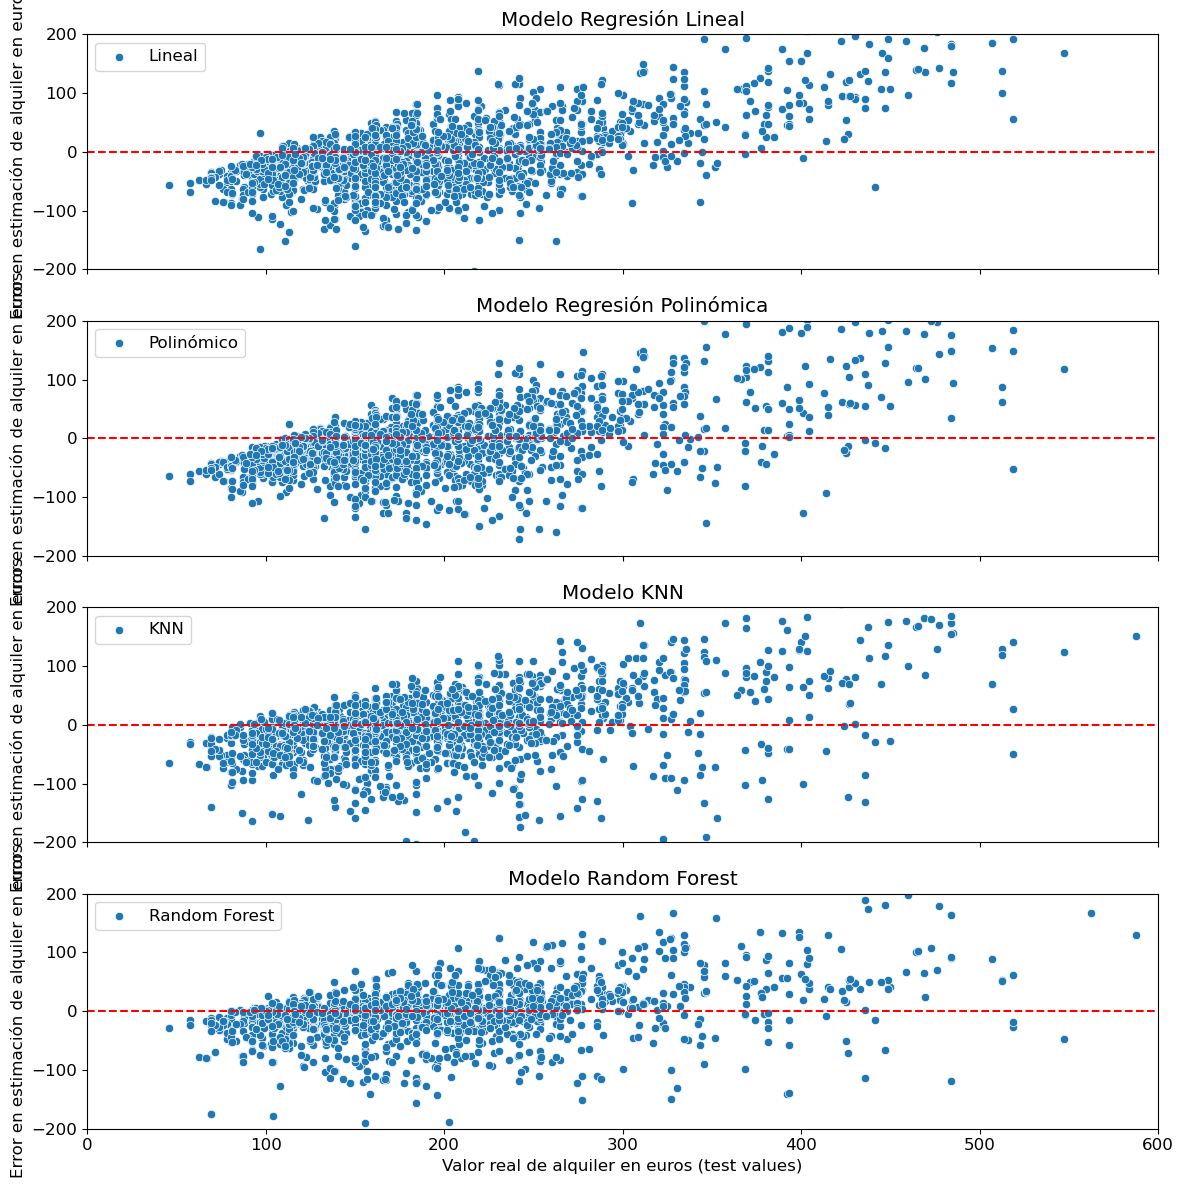

In [68]:
residuos_test_lr = y_test - y_pred_lr
residuos_test_poly = y_test - y_pred_poly
residuos_test_knn = y_test - y_pred_knn
residuos_test_rf = y_test - y_pred_rf

residuos_test_graf = {
    'residuos_test_lr': residuos_test_lr,
    'residuos_test_poly': residuos_test_poly,
    'residuos_test_knn': residuos_test_knn,
    'residuos_test_rf': residuos_test_rf,
    'y_test': y_test
}


df_residuos_test_graf = pd.DataFrame(residuos_test_graf)

fig, ax = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

sns.scatterplot(data=df_residuos_test_graf, x='y_test', y='residuos_test_lr', label='Lineal', ax=ax[0])
ax[0].set_ylim(-200, 200)
ax[0].set_ylabel('Error en estimación de alquiler en euros')
ax[0].set_title('Modelo Regresión Lineal')
ax[0].plot([0, 600], [0, 0], color='red', linestyle='--')

sns.scatterplot(data=df_residuos_test_graf, x='y_test', y='residuos_test_poly', label='Polinómico', ax=ax[1])
ax[1].set_ylim(-200, 200)
ax[1].set_ylabel('Error en estimación de alquiler en euros')
ax[1].set_title('Modelo Regresión Polinómica')
ax[1].plot([0, 600], [0, 0], color='red', linestyle='--')

sns.scatterplot(data=df_residuos_test_graf, x='y_test', y='residuos_test_knn', label='KNN', ax=ax[2])
ax[2].set_ylim(-200, 200)
ax[2].set_ylabel('Error en estimación de alquiler en euros')
ax[2].set_title('Modelo KNN')
ax[2].plot([0, 600], [0, 0], color='red', linestyle='--')

sns.scatterplot(data=df_residuos_test_graf, x='y_test', y='residuos_test_rf', label='Random Forest', ax=ax[3])
ax[3].set_ylim(-200, 200)
ax[3].set_ylabel('Error en estimación de alquiler en euros')
ax[3].set_title('Modelo Random Forest')
ax[3].plot([0, 600], [0, 0], color='red', linestyle='--')
ax[3].set_xlim(0, 600)
ax[3].set_xlabel('Valor real de alquiler en euros (test values)')

plt.tight_layout()
plt.show()


A primera vista, parece que el modelo Random Forest tuviera menos residuos en el cálculo de los precios de alquiler, según los gráficos realizados para los valores de test.

Repetiremos el gráfico, pero esta vez para los valores de train.

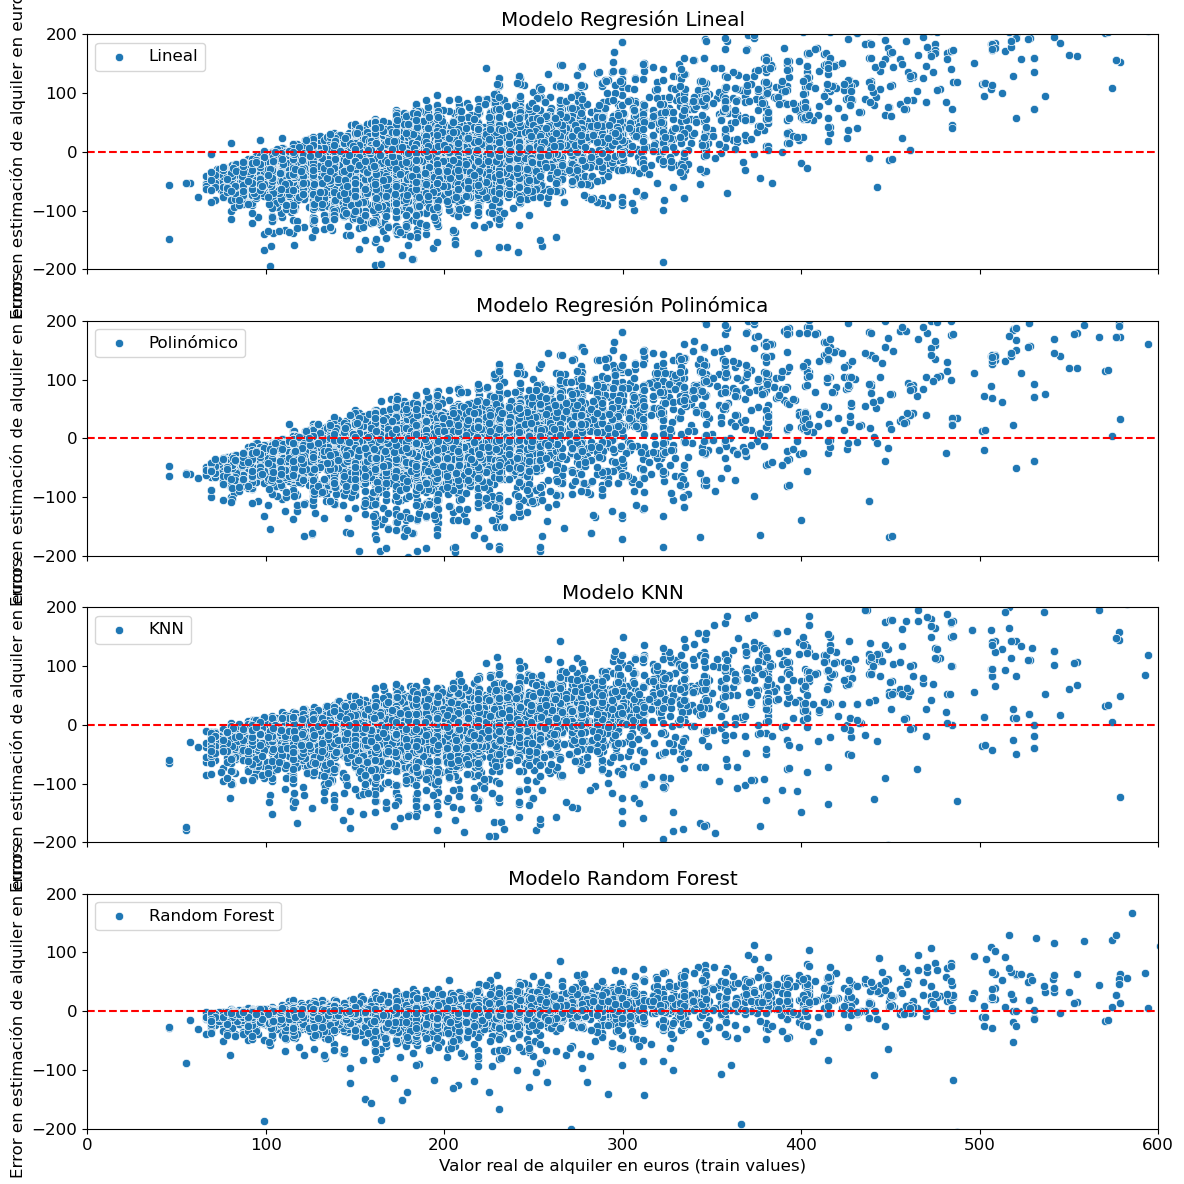

In [69]:
residuos_train_lr = y_train - y_pred_train_lr
residuos_train_poly = y_train - y_pred_train_poly
residuos_train_knn = y_train - y_pred_train_knn
residuos_train_rf = y_train - y_pred_train_rf

residuos_train_graf = {
    'residuos_train_lr': residuos_train_lr,
    'residuos_train_poly': residuos_train_poly,
    'residuos_train_knn': residuos_train_knn,
    'residuos_train_rf': residuos_train_rf,
    'y_train': y_train
}

df_residuos_train_graf = pd.DataFrame(residuos_train_graf)

fig, ax = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

sns.scatterplot(data=df_residuos_train_graf, x='y_train', y='residuos_train_lr', label='Lineal', ax=ax[0])
ax[0].set_ylim(-200, 200)
ax[0].set_ylabel('Error en estimación de alquiler en euros')
ax[0].set_title('Modelo Regresión Lineal')
ax[0].plot([0, 600], [0, 0], color='red', linestyle='--')

sns.scatterplot(data=df_residuos_train_graf, x='y_train', y='residuos_train_poly', label='Polinómico', ax=ax[1])
ax[1].set_ylim(-200, 200)
ax[1].set_ylabel('Error en estimación de alquiler en euros')
ax[1].set_title('Modelo Regresión Polinómica')
ax[1].plot([0, 600], [0, 0], color='red', linestyle='--')

sns.scatterplot(data=df_residuos_train_graf, x='y_train', y='residuos_train_knn', label='KNN', ax=ax[2])
ax[2].set_ylim(-200, 200)
ax[2].set_ylabel('Error en estimación de alquiler en euros')
ax[2].set_title('Modelo KNN')
ax[2].plot([0, 600], [0, 0], color='red', linestyle='--')

sns.scatterplot(data=df_residuos_train_graf, x='y_train', y='residuos_train_rf', label='Random Forest', ax=ax[3])
ax[3].set_ylim(-200, 200)
ax[3].set_ylabel('Error en estimación de alquiler en euros')
ax[3].set_title('Modelo Random Forest')
ax[3].plot([0, 600], [0, 0], color='red', linestyle='--')
ax[3].set_xlim(0, 600)
ax[3].set_xlabel('Valor real de alquiler en euros (train values)')

plt.tight_layout()
plt.show()


Para el gráfico de residuos en el cálculo de precio de alquiler, usando los valores de train, podemos confirmar que el modelo de Random Forest predice en forma más cercana al verdadero valor.

Para finalizar las comparaciones entre modelos, graficaremos las métricas más importantes de los 4 modelos empleados.

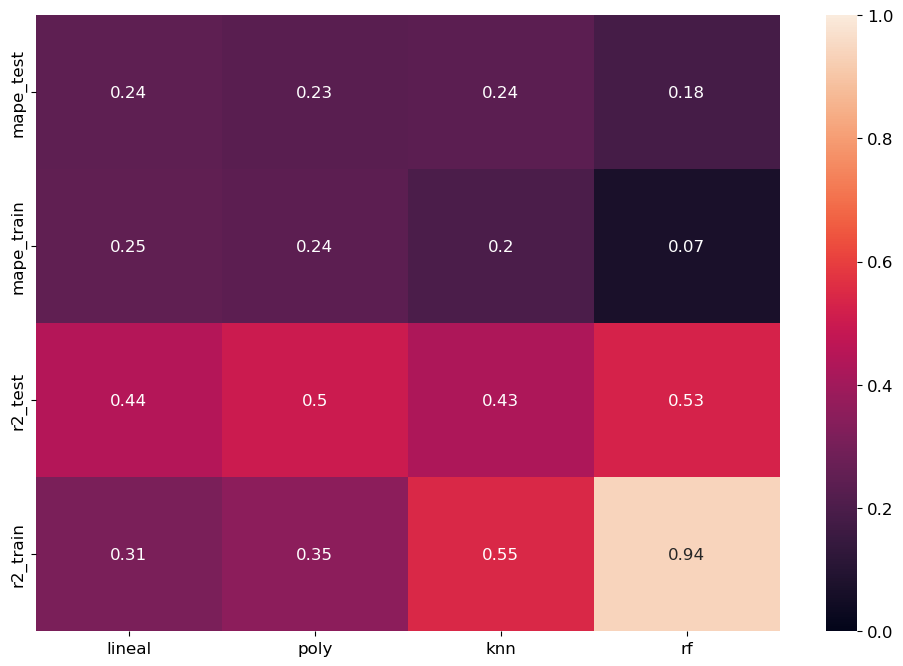

In [70]:
lineal = [mape_lr, mape_lr_train, r2_lr, r2_lr_train]
poly = [mape_poly, mape_poly_train, r2_poly, r2_poly_train]
knn = [mape_knn, mape_knn_train, r2_knn, r2_knn_train]
rf = [mape_rf, mape_rf_train, r2_rf, r2_rf_train]

metricas_graf = {
    'lineal': lineal,
    'poly': poly,
    'knn': knn,
    'rf': rf
}

metricas_graf_df = pd.DataFrame(metricas_graf)

nombres_filas = ['mape_test', 'mape_train', 'r2_test', 'r2_train']
metricas_graf_df.index = nombres_filas

fig, ax = plt.subplots(figsize=(12,8))
ax=sns.heatmap(metricas_graf_df, annot=True, vmin=0, vmax=1)
plt.show()


En el mapa de calor, puede verse que el modelo que presenta los valores de mape más bajos (18% y 7%) y los valores de r2 más altos (53% y 94%), para valores de test y train respectivamente, es el modelo de Random Forest. Esta información confirma lo observado en los gráfico de residuos anteriores.

## 5- CONCLUSIONES

En función de las métricas graficadas en el apartado anterior, entendemos que el modelo obtenido mediante el algoritmo de Random Forest permite obtener una estimación aceptable para el valor de alquiler de una propiedad, conociendo los parámetros necesarios.

Una vez obtenido el valor de renta esperada de la propiedad, podemos definir el valor máximo de compra que el inversor debe estar dispuesto a pagar, a través de la tasa de rentabilidad esperada, que puede obtenerse como la tasa promedio de las inversiones que tiene realizada el inversor o, más sencillamente, como el costo del capital a invertir.

